In [39]:
###  Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.pylab as pylab
from matplotlib import rcParams
from cycler import cycler

In [30]:
# Load the Excel file 
# Use the correct file name
file_path = 'All plots data compiled_11-13-25.xlsx'

In [31]:
###Load VWC data from Sheet Fig.5f
data1 = pd.read_excel(file_path, sheet_name='Fig.5f')

In [32]:
#Columns Name
data1.columns

Index(['VWC (%)', 'Delta Fr at 60 cm PRA', 'Delta Fr at 120 cm PRA',
       'Delta Fr at 180 cm PRA', 'Delta Fr at 60 cm HRA'],
      dtype='object')

In [33]:
##Copy the data
Xv = data1['VWC (%)']
Y1v = data1['Delta Fr at 60 cm PRA']
Y2v = data1['Delta Fr at 120 cm PRA']
Y3v = data1['Delta Fr at 180 cm PRA']
Y4v = data1['Delta Fr at 60 cm HRA']

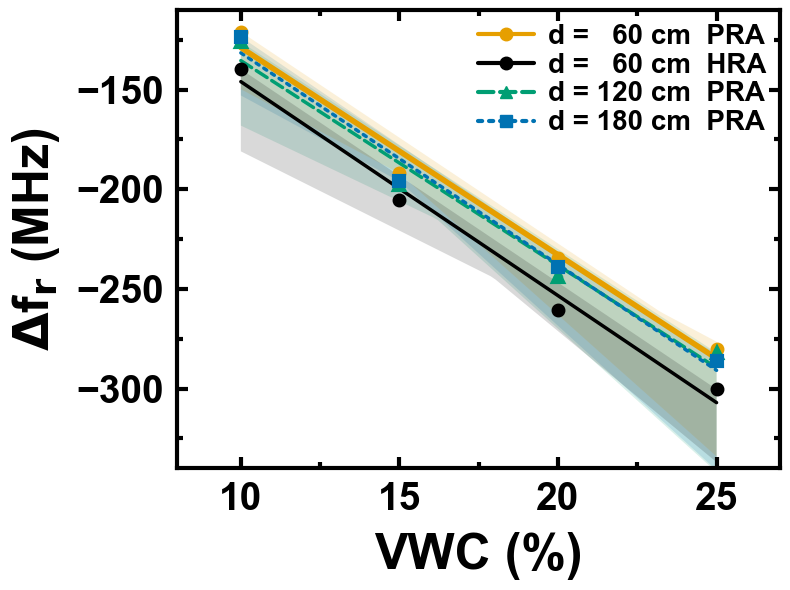

In [34]:
## Setup all parameter for plot exact size and font like Origin figure, We can more parameters 
rcParams['svg.fonttype'] = 'none'
params = {'lines.linewidth':3,
         'font.family': 'Arial',
         'font.weight': 'bold',
         'axes.labelweight': 'bold',
         'axes.labelsize':36,
         'xtick.labelsize':28,
         'ytick.labelsize':28,
         'legend.fontsize': 20,
         'legend.handlelength': 2,
         'legend.labelspacing':0.1, 
         'legend.loc':'best',
         'legend.borderpad':0.1,
         'legend.borderaxespad':0.4,
         'legend.handletextpad':0.5,
         'legend.frameon':False,   
         }
pylab.rcParams.update(params)

# Plot data
plt.figure(figsize=(8, 6))
#plt.plot(Xv, Y1v, Xv,Y4v,solid_capstyle='round',marker = 'o',ms = 9)
#plt.plot(Xv, Y2v,'--',dash_capstyle='round',marker = '^',ms = 9)

#plt.plot(Xv, Y3v,':',dash_capstyle='round',marker = 's',ms = 9)

#plt.rcParams['axes.prop_cycle'] = cycler(color=['k', 'r','g','b'])
plt.errorbar(Xv, Y1v, linestyle='None',color='#E69F00',solid_capstyle='round',marker = 'o', ms = 7, mfc = '#E69F00', mec = '#E69F00',capsize=4,markeredgewidth=3)
plt.errorbar(Xv, Y4v,linestyle='None',color='#000000',solid_capstyle='round',marker = 'o', ms = 7, mfc = '#000000', mec = '#000000',capsize=4,markeredgewidth=3)
plt.plot( np.nan,color='#E69F00',linestyle='solid', solid_capstyle='round',lw=3,label=r'd =   60 cm  PRA',marker = 'o', ms = 9)
plt.plot(np.nan, color='#000000',linestyle='solid',solid_capstyle='round',lw=3,label=r'd =   60 cm  HRA',marker = 'o', ms = 9)
# deg=1 means linear fit (i.e. polynomial of degree 1)
plt.errorbar(Xv, Y2v, linestyle='None',color='#009E73',solid_capstyle='round',marker = '^', ms = 7, mfc = '#009E73', mec = '#009E73',capsize=4,markeredgewidth=3)
plt.errorbar(Xv, Y3v,linestyle='None',color='#0072B2',solid_capstyle='round',marker = 's', ms = 7, mfc = '#0072B2', mec = '#0072B2',capsize=4,markeredgewidth=3)
plt.plot( np.nan,color='#009E73',linestyle='--', dash_capstyle='round',lw=3,label=r'd =   120 cm  PRA',marker = '^', ms = 9)
plt.plot(np.nan, color='#0072B2',linestyle=':',dash_capstyle='round',lw=3,label=r'd =   180 cm  PRA',marker = 's', ms = 9)



# Plot regression line

b1, a1 = np.polyfit(Xv, Y1v, deg=1)
b2, a2 = np.polyfit(Xv, Y2v, deg=1)
b3, a3 = np.polyfit(Xv, Y3v, deg=1)
b4, a4 = np.polyfit(Xv, Y4v, deg=1)



plt.plot(Xv, a2 + b2 * Xv, color="#009E73",linestyle='--', lw=2.5,dash_capstyle='round')
plt.plot(Xv, a3 + b3 * Xv, color="#0072B2",linestyle=':', lw=2.5,dash_capstyle='round')
plt.plot(Xv, a1 + b1 * Xv, color="#E69F00",linestyle='solid', lw=4,solid_capstyle='round')
plt.plot(Xv, a4 + b4 * Xv, color="#000000", linestyle='solid',lw=2.5,solid_capstyle='round')


#sns.regplot(x=Xv, y=Y2v, color='g',line_kws={"ls":'None'})
#sns.regplot(x=Xv, y=Y3v, color='b',line_kws={"ls":'None'})
#sns.regplot(x=Xv, y=Y1v, color='r',line_kws={"ls":'None'})
#sns.regplot(x=Xv, y=Y4v, color='k',line_kws={"ls":"None"})
sns.regplot(x=Xv, y=Y2v, color='#009E73', line_kws={"ls":'None'})  # Green 
sns.regplot(x=Xv, y=Y3v, color='#0072B2', line_kws={"ls":'None'})  # Blue
sns.regplot(x=Xv, y=Y1v, color='#E69F00', line_kws={"ls":'None'})  # Orange
sns.regplot(x=Xv, y=Y4v, color='#000000', line_kws={"ls":'None'})  # Black

plt.xlabel('VWC (%)',labelpad=10)
plt.ylabel( r'$\Delta$f$_{\rm r}$ (MHz)',labelpad=10)
# control x and y limits

plt.xlim(8, 27)
plt.ylim(-340, -110)



## Color setup of the plot. We can use HEX code from origin to get exact color from Orgini Plot
#plt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'k'])
# Set axis step size and controlling the step size of the axis
x_step = 5  # Set x-axis step size to 10
y_step = 50  # Set y-axis step size to 5
plt.gca().xaxis.set_major_locator(MultipleLocator(x_step))
plt.gca().xaxis.set_minor_locator(MultipleLocator(x_step/2))
plt.gca().yaxis.set_major_locator(MultipleLocator(y_step))
plt.gca().yaxis.set_minor_locator(MultipleLocator(y_step/2))

#Controlling the tick parameters size of the axis
plt.tick_params(which= 'major',direction='in',pad=10, length=8, width=3, right=True, top=True)
plt.tick_params(which= 'minor',direction='in',length=4, width=3, right=True, top=True)
#Controlling the width size of the axis (frame of the plot)
for axis in ['top', 'bottom', 'left', 'right']:

    plt.gca().spines[axis].set_linewidth(3)  # change width
    plt.gca().spines[axis].set_color('black')    # change color

# Show the plot'
legend_label=[r'd =   60 cm  PRA', 'd =   60 cm  HRA', 'd = 120 cm  PRA','d = 180 cm  PRA']
plt.legend(legend_label)

plt.tight_layout()
#plt.savefig('fig5_f_new.png',bbox_inches='tight', dpi=1000, transparent=True)# bbox_inches removes extra white spaces
#plt.savefig("fig5_f.svg", bbox_inches='tight', dpi=600, transparent=True,format="svg")
plt.show()

In [35]:
###Load EC data from Sheet Fig.5g
data2 = pd.read_excel(file_path, sheet_name='Fig.5g')

In [36]:
#Columns Name
data2.columns

Index(['Conductivity (dS/m)', 'S11 (EC)/ S11 (ref) at 60 cm PRA',
       'S11 (EC)/ S11 (ref) at 120 cm PRA',
       'S11 (EC)/ S11 (ref) at 180 cm PRA',
       'S11 (EC)/ S11 (ref) at 60 cm PRA.1'],
      dtype='object')

In [37]:
##Copy the data
Xs = data2['Conductivity (dS/m)']
Y1 = data2['S11 (EC)/ S11 (ref) at 60 cm PRA']
Y2 = data2['S11 (EC)/ S11 (ref) at 120 cm PRA']
Y3 = data2['S11 (EC)/ S11 (ref) at 180 cm PRA']
Y4 = data2['S11 (EC)/ S11 (ref) at 180 cm PRA']

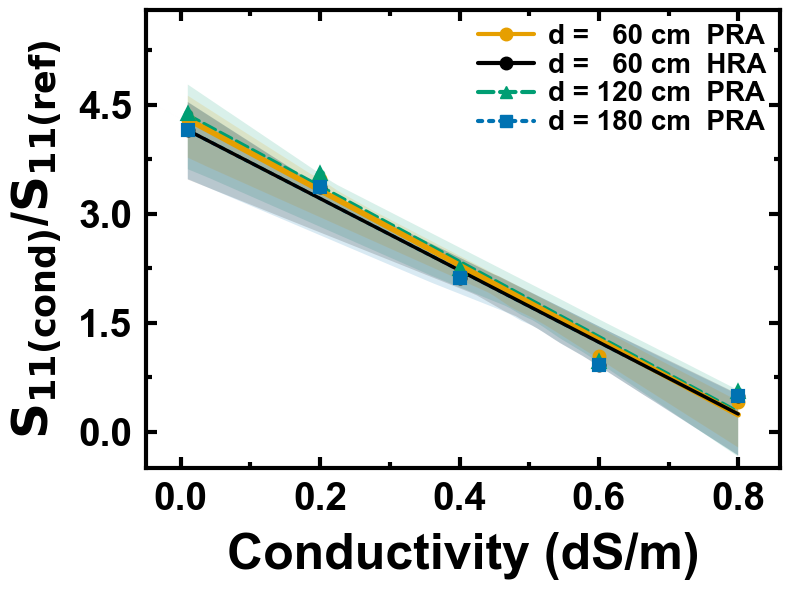

In [38]:
## Setup all parameter for plot exact size and font like Origin figure, We can more parameters 
rcParams['svg.fonttype'] = 'none'
params = {'lines.linewidth':3,
         'font.family': 'Arial',
         'font.weight': 'bold',
         'axes.labelweight': 'bold',
         'axes.labelsize':36,
         'xtick.labelsize':28,
         'ytick.labelsize':28,
         'legend.fontsize': 20,
         'legend.handlelength': 2,
         'legend.labelspacing':0.1, 
         'legend.loc':'best',
         'legend.borderpad':0.1,
         'legend.borderaxespad':0.4,
         'legend.handletextpad':0.5,
         'legend.frameon':False,   
         }
pylab.rcParams.update(params)

# Plot data
plt.figure(figsize=(8, 6))

plt.errorbar(Xs, Y1, linestyle='None',color='#E69F00',solid_capstyle='round',marker = 'o', ms = 7, mfc = '#E69F00', mec = '#E69F00',capsize=4,markeredgewidth=3)
plt.errorbar(Xs, Y4,linestyle='None',color='#000000',solid_capstyle='round',marker = 'o', ms = 7, mfc = '#000000', mec = '#000000',capsize=4,markeredgewidth=3)
plt.plot( np.nan,color='#E69F00',linestyle='solid', solid_capstyle='round',lw=3,label=r'd =   60 cm  RA',marker = 'o', ms = 9)
plt.plot(np.nan, color='#000000',linestyle='solid',solid_capstyle='round',lw=3,label=r'd =   60 cm  HA',marker = 'o', ms = 9)
# deg=1 means linear fit (i.e. polynomial of degree 1)
plt.errorbar(Xs, Y2, linestyle='None',color='#009E73',solid_capstyle='round',marker = '^', ms = 7, mfc = '#009E73', mec = '#009E73',capsize=4,markeredgewidth=3)
plt.errorbar(Xs, Y3,linestyle='None',color='#0072B2',solid_capstyle='round',marker = 's', ms = 7, mfc = '#0072B2', mec = '#0072B2',capsize=4,markeredgewidth=3)
plt.plot( np.nan,color='#009E73',linestyle='--', dash_capstyle='round',lw=3,label=r'd =   120 cm  RA',marker = '^', ms = 9)
plt.plot(np.nan, color='#0072B2',linestyle=':',dash_capstyle='round',lw=3,label=r'd =   180 cm  HA',marker = 's', ms = 9)



# Plot regression line

b1, a1 = np.polyfit(Xs, Y1, deg=1)
b2, a2 = np.polyfit(Xs, Y2, deg=1)
b3, a3 = np.polyfit(Xs, Y3, deg=1)
b4, a4 = np.polyfit(Xs, Y4, deg=1)
plt.plot(Xs, a2 + b2 * Xs, color="#009E73",linestyle='--', lw=2.5,dash_capstyle='round')
plt.plot(Xs, a3 + b3 * Xs, color="#0072B2",linestyle=':', lw=2.5,dash_capstyle='round')
plt.plot(Xs, a1 + b1 * Xs, color="#E69F00",linestyle='solid', lw=4,solid_capstyle='round')
plt.plot(Xs, a4 + b4 * Xs, color="#000000", linestyle='solid',lw=2.5,solid_capstyle='round')



#sns.regplot(x=Xs, y=Y2, color='g',line_kws={"ls":'None'})
#sns.regplot(x=Xs, y=Y3, color='b',line_kws={"ls":'None'})
#sns.regplot(x=Xs, y=Y1, color='r',line_kws={"ls":'None'})
#sns.regplot(x=Xs, y=Y4, color='k',line_kws={"ls":"None"})
sns.regplot(x=Xs, y=Y2, color='#009E73', line_kws={"ls":'None'})  # Green 
sns.regplot(x=Xs, y=Y3, color='#0072B2', line_kws={"ls":'None'})  # Blue
sns.regplot(x=Xs, y=Y1, color='#E69F00', line_kws={"ls":'None'})  # Orange
sns.regplot(x=Xs, y=Y4, color='#000000', line_kws={"ls":'None'})  # Black

plt.xlabel('Conductivity (dS/m)',labelpad=10)

plt.ylabel( r'$\bf{S_{11(cond)}}$/$\bf{S_{11(ref)}}$',labelpad=10)
# control x and y limits
plt.xlim(-0.05, 0.86)
plt.ylim(-0.5, 5.8)



## Color setup of the plot. We can use HEX code from origin to get exact color from Orgini Plot
#plt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'k'])
# Set axis step size and controlling the step size of the axis
x_step = 0.2  # Set x-axis step size to 10
y_step = 1.5  # Set y-axis step size to 5
plt.gca().xaxis.set_major_locator(MultipleLocator(x_step))
plt.gca().xaxis.set_minor_locator(MultipleLocator(x_step/2))
plt.gca().yaxis.set_major_locator(MultipleLocator(y_step))
plt.gca().yaxis.set_minor_locator(MultipleLocator(y_step/2))

#Controlling the tick parameters size of the axis
plt.tick_params(which= 'major',direction='in',pad=10, length=8, width=3, right=True, top=True)
plt.tick_params(which= 'minor',direction='in',length=4, width=3, right=True, top=True)
#Controlling the width size of the axis (frame of the plot)
for axis in ['top', 'bottom', 'left', 'right']:

    plt.gca().spines[axis].set_linewidth(3)  # change width
    plt.gca().spines[axis].set_color('black')    # change color
legend_label=[r'd =   60 cm  PRA', 'd =   60 cm  HRA', 'd = 120 cm  PRA','d = 180 cm  PRA']
# Show the plot
plt.legend(legend_label)

#plt.legend(bbox_to_anchor=(0.95,0.95))
plt.tight_layout()
#plt.savefig('fig5_g_new.png',bbox_inches='tight', dpi=1000, transparent=True)# bbox_inches removes extra white spaces
#plt.savefig("fig5_g.svg", bbox_inches='tight', dpi=600, transparent=True,format="svg")
plt.show()